In [7]:
import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events'
figure_folder = '{}/kmers'.format(folder)
!mkdir $figure_folder

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages_changing_events', flotilla_dir=flotilla_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-01-11 12:35:32	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages_changing_events/datapackage.json
2016-01-11 12:35:32	Parsing datapackage to create a Study object
2016-01-11 12:36:04	Initializing Study
2016-01-11 12:36:04	Initializing Predictor configuration manager for Study
2016-01-11 12:36:04	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-01-11 12:36:04	Added ExtraTreesClassifier to default predictors
2016-01-11 12:36:04	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-01-11 12:36:04	Added ExtraTreesRegressor to default predictors
2016-01-11 12:36:04	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-01-11 12:36:04	Added GradientBoostingClassifier to default pr

In [79]:
changing_events_cols = 'Changing Events', 'Strict Changing Events'

FIGURE_FOLDER = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/kmers'


def folderize(col):
    """Replace spaces with underscores, add to changing events folder for a new folder"""
    new_folder = '{}/{}'.format(FIGURE_FOLDER, col.replace(' ', '_').lower())
    ! mkdir -p $new_folder
    return new_folder

for col in changing_events_cols:
    new_folder = folderize(col)
    print new_folder
#     ! mkdir $new_folder

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/kmers/changing_events
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/kmers/strict_changing_events


In [5]:
study.supplemental.voyages.head()

,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.045048,-0.054198,0.070475,iPSC,NPC,$\searrow$,iPSC-NPC,~1,~1
1,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,0.035088,0.035088,iPSC,MN,$\nwarrow$,iPSC-MN,~1,~1
2,exon:chr10:102114184-102114389:+@exon:chr10:10...,-0.045048,0.089286,0.100006,NPC,MN,$\nwarrow$,NPC-MN,~1,~1
3,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,NPC,NaN,iPSC-NPC,~1,~1
4,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1


In [8]:
import matplotlib as mpl

{'MN': u'#e62a8a', 'NPC': u'#396bb0', 'iPSC': u'#1b9e77', 'sMN': u'#fdc086'}

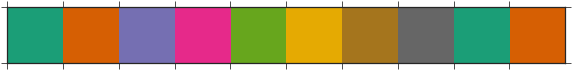

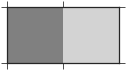

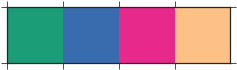

In [70]:
accent = sns.color_palette("Accent")
dark2 = sns.color_palette('Dark2', n_colors=10)
sns.palplot(dark2)



region_to_color = dict(zip(['upstream', 'downstream'], 
                           ['lightgrey', 'grey']))
sns.palplot(pd.Series(region_to_color))

# This is the winner!!
celltype_palette = dark2[0], accent[4], dark2[3], accent[2]
sns.palplot(celltype_palette)

celltype_palette = map(mpl.colors.rgb2hex, celltype_palette)

phenotype_to_color = dict(zip(['iPSC', 'NPC', "MN", "sMN"], celltype_palette))
# phenotype_to_color

study.metadata.phenotype_to_color = phenotype_to_color
study.phenotype_to_color

Separate ids for single cells that aren't outliers

In [10]:
singles_not_outliers = study.sample_subset_to_sample_ids('~pooled') & study.sample_subset_to_sample_ids('~outlier')
print singles_not_outliers[:5]

Index([u'CVN_01', u'CVN_02', u'CVN_03', u'CVN_04', u'CVN_05'], dtype='object')


## Kmers enriched in different tiers

In [11]:
changing_events_cols = 'Changing Events', 'Strict Changing Events'

In [49]:
study.supplemental.voyages.loc[study.supplemental.voyages['event_id'].isin(tier1), 'Tier'] = "Tier 1"
study.supplemental.voyages.loc[study.supplemental.voyages['event_id'].isin(tier2), 'Tier'] = "Tier 2"
study.supplemental.voyages.groupby('Tier').size()

Tier
Tier 1     504
Tier 2    1432
dtype: int64

In [50]:
study.supplemental.voyages.groupby(['Tier', 'direction']).size()

Tier    direction 
Tier 1  $\nearrow$     86
        $\nwarrow$    142
        $\searrow$    237
        $\swarrow$     39
Tier 2  $\nearrow$    161
        $\nwarrow$    278
        $\searrow$    345
        $\swarrow$    648
dtype: int64

In [51]:
from astrolabe.utils import remove_latex_chars_from_arrow

In [18]:
bed_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_changing_events/kmers'
! mkdir $bed_folder

In [53]:
background_events = background.copy()

7948

In [16]:
events = study.splicing.feature_data[changing_events_cols[1]].dropna().index
len(events)

7858

In [19]:
name = changing_events_cols[0]

In [44]:
from outrigger.region import Region
import pybedtools
import kvector
from Bio import SeqIO
import kvector
from astrolabe.utils import remove_latex_chars_from_arrow
import pyhomer

changing_kmer_zscores = {}

for name in changing_events_cols:
    print name
    col = study.splicing.feature_data[name].dropna()
    events = col.index
    print '\t', len(events)

    foreground_events = col.index[col == 'Foreground']
    background_events = col.index[col == 'Background']

    folder_suffix = name.replace(' ', '_').lower()
#     print '\t', folder_suffix
    col_bed_folder = '{}/{}'.format(bed_folder, folder_suffix)
    col_figure_folder = '{}/{}'.format(figure_folder, folder_suffix)
    ! mkdir -p $col_bed_folder
    ! mkdir -p $col_figure_folder

    exon2s = map(lambda x: x.split('@')[1], events)
    exon2_regions = map(Region, exon2s)

    exon2_bed_table = pd.DataFrame(map(lambda x: [x.chrom, x._start, x._stop, x.name, 1000, x.strand], exon2_regions))
    exon2_bed_table[3] = events
    exon2_bed_table = exon2_bed_table.sort_values(by=3)

    exon_bedfile = '{}/exon2.bed'.format(col_bed_folder)
    exon2_bed_table.to_csv(exon_bedfile, index=False, header=False, sep='\t')
    # exon2_bed_table.head()
    exon_bed = pybedtools.BedTool(exon_bedfile)
    # exon_bed.filter(lambda x: x.name in event_names)


    DIRECTIONS = 'upstream', 'downstream'


    placental_filename = '/projects/ps-yeolab/genomes/hg19/database/phastConsElements46wayPlacental.bed'
    placental = pybedtools.BedTool(placental_filename)


    conservation_bed = placental

    genome = 'hg19'

    nt = 400



    genome_fasta = '/projects/ps-yeolab/genomes/hg19/chromosomes/all.fa'


    kmer_zscores = []


    for (arrow), df in study.supplemental.voyages.groupby(['direction']):
        print '---\n\t', arrow

        format_args = col_bed_folder, remove_latex_chars_from_arrow(arrow)
        foreground_table = exon2_bed_table.loc[exon2_bed_table[3].isin(foreground_events) & exon2_bed_table[3].isin(df.event_id)]
        print '\t\t foreground', foreground_table.shape
        foreground_filename = '{}/exon2_{}_foreground.bed'.format(*format_args)
        foreground_table.to_csv(foreground_filename, index=False, header=False, sep='\t')
        foreground = pybedtools.BedTool(foreground_filename)

        background_table = exon2_bed_table.loc[exon2_bed_table[3].isin(background_events) & exon2_bed_table[3].isin(df.event_id)]
        background_filename = '{}/exon2_{}_background.bed'.format(*format_args)
        print '\t\t background', background_table.shape
        background_table.to_csv(background_filename, index=False, header=False, sep='\t')
        background = pybedtools.BedTool(background_filename)

        pair = pyhomer.ForegroundBackgroundPair(foreground, background)
    #         print '\n', pair 

        for direction in DIRECTIONS:
            print '\n\t\t', direction
            intron_pair = pair.flanking_intron(direction, 'hg19', 400)

            conserved_introns = intron_pair.intersect(conservation_bed, 'placental')
    #             print '\n', conserved_introns
    #         %time 
            seqs = conserved_introns.foreground.sequence(fi=genome_fasta, s=True)
    #         import pdb; pdb.set_trace()

            %time changing_kmers = kvector.count_kmers(seqs.seqfn)

            %time seqs = conserved_introns.background.sequence(fi=genome_fasta, s=True)
            %time unchanging_kmers = kvector.count_kmers(seqs.seqfn)
            
            # Sum both for background
            background_kmers = unchanging_kmers + changing_kmers

            # Use changing as foreground
            kmer_zscore = (changing_kmers.mean() - background_kmers.mean())/background_kmers.std()
            kmer_zscore.name = 'changing_{}{}nt_{}_placental'.format(direction, nt, remove_latex_chars_from_arrow(arrow))
            kmer_zscores.append(kmer_zscore)
            # Use unchanging as foreground
            kmer_zscore = (unchanging_kmers.mean() - background_kmers.mean())/background_kmers.std()
            kmer_zscore.name = 'unchanging_{}{}nt_{}_placental'.format(direction, nt, remove_latex_chars_from_arrow(arrow))
            kmer_zscores.append(kmer_zscore)
    kmer_zscores_all = pd.concat(kmer_zscores, axis=1)
#     kmer_zscores_all.head()
    changing_kmer_zscores[name] = kmer_zscores_all


Changing Events
	7948
---
	$\nearrow$
		 foreground (151, 6)
		 background (288, 6)

		upstream
CPU times: user 11.9 s, sys: 7 ms, total: 11.9 s
Wall time: 11.9 s
CPU times: user 0 ns, sys: 11 ms, total: 11 ms
Wall time: 46.7 ms
CPU times: user 15.2 s, sys: 16 ms, total: 15.2 s
Wall time: 15.2 s

		downstream
CPU times: user 11.7 s, sys: 3 ms, total: 11.7 s
Wall time: 11.7 s
CPU times: user 2 ms, sys: 10 ms, total: 12 ms
Wall time: 47.7 ms
CPU times: user 15.1 s, sys: 4 ms, total: 15.2 s
Wall time: 15.1 s
---
	$\nwarrow$
		 foreground (253, 6)
		 background (1532, 6)

		upstream
CPU times: user 17 s, sys: 15 ms, total: 17 s
Wall time: 17 s
CPU times: user 1e+03 µs, sys: 11 ms, total: 12 ms
Wall time: 48.3 ms
CPU times: user 59.4 s, sys: 34 ms, total: 59.4 s
Wall time: 59.4 s

		downstream
CPU times: user 15.3 s, sys: 28 ms, total: 15.4 s
Wall time: 15.4 s
CPU times: user 1e+03 µs, sys: 12 ms, total: 13 ms
Wall time: 101 ms
CPU times: user 1min 7s, sys: 45 ms, total: 1min 7s
Wall time: 

In [83]:
background_kmers.shape

(1438, 5376)

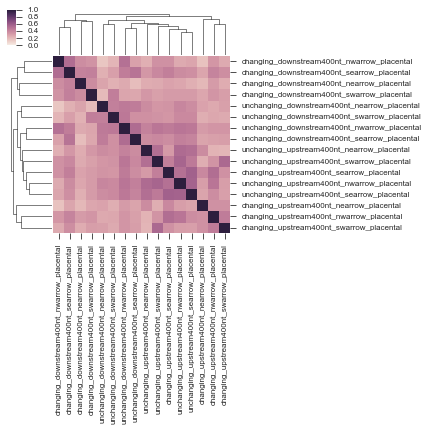

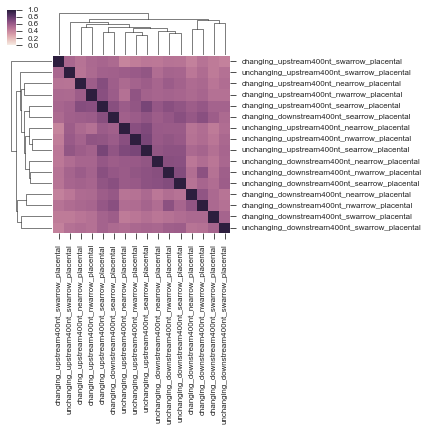

In [98]:
for name, df in changing_kmer_zscores.items():
#     fig, ax = plt.subplots()
    g = sns.clustermap(df.corr(), figsize=(4, 4), vmin=0)
#     g.savefig('{}/{}/corr_clustermap.pdf'.format(figure_folder, name.lower().replace(' ', '_')))


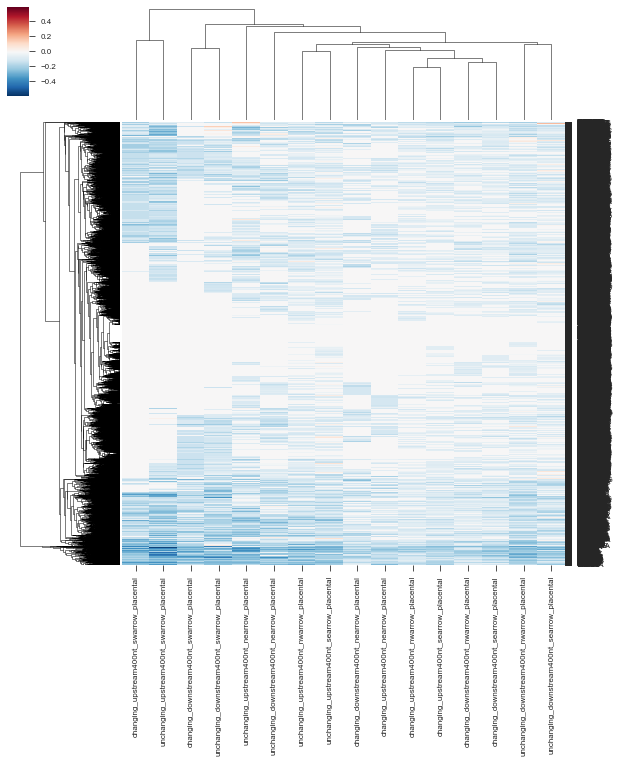

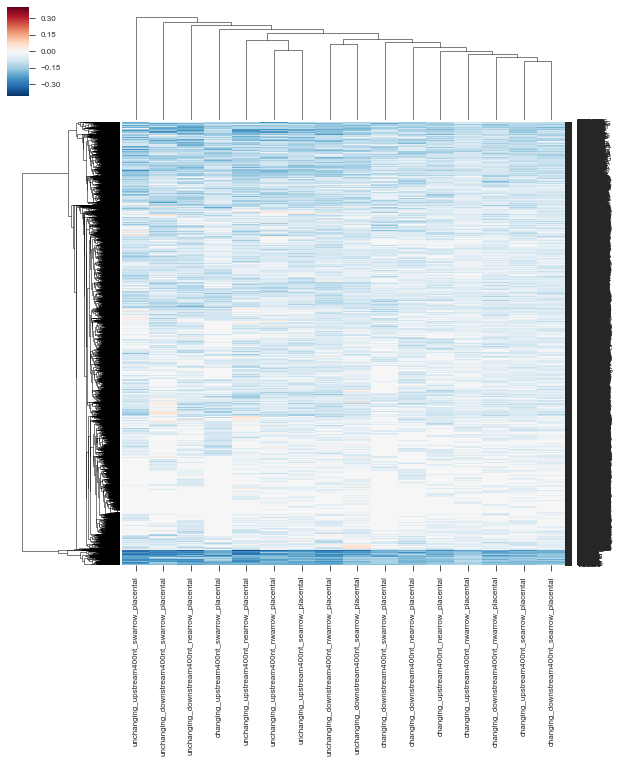

In [97]:
for name, df in changing_kmer_zscores.items():
#     fig, ax = plt.subplots()
    g = sns.clustermap(df.fillna(0))
#     g.savefig('{}/{}/corr_clustermap.pdf'.format(figure_folder, name.lower().replace(' ', '_')))


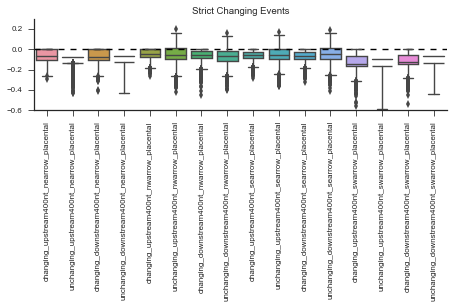

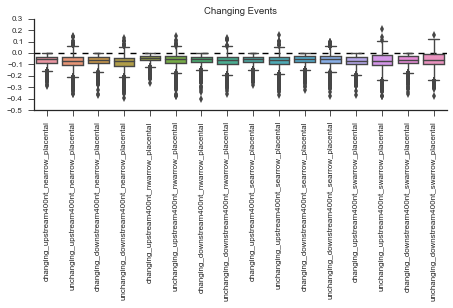

In [46]:
for name, df in changing_kmer_zscores.items():
    fig, ax = plt.subplots()
    sns.boxplot(df, ax=ax)
    ax.set(title=name)
    ax.set_xticklabels(df.columns, rotation=90);
    xmin, xmax = ax.get_xlim()
    ax.hlines(0, xmin, xmax, linestyle='--', color='k')
    sns.despine()
    fig.tight_layout()

In [61]:
! grep 'exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+' $folder/background_events.bed

chr10	103364897	103364969	exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+	1000	+
chr10	103364897	103364969	exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369425:+	1000	+


In [ ]:
data = changing_kmer_zscores['Changing Events']

In [ ]:
changing_kmer_zscores['Changing Events'][np.isinf(changing_kmer_zscores['Changing Events'])] = 0

(5376, 2)


In [69]:
kmer_metadata = pd.DataFrame(list(changing_kmer_zscores['Changing Events'].columns.map(lambda x: x.split('_'))),
                             index=changing_kmer_zscores['Changing Events'].columns)
kmer_metadata = kmer_metadata.rename(columns={0:'Status', 1:"Region", 2:"Arrow", 3:"Clade"})
kmer_metadata

,Status,Region,Arrow,Clade
changing_upstream400nt_nearrow_placental,changing,upstream400nt,nearrow,placental
unchanging_upstream400nt_nearrow_placental,unchanging,upstream400nt,nearrow,placental
changing_downstream400nt_nearrow_placental,changing,downstream400nt,nearrow,placental
unchanging_downstream400nt_nearrow_placental,unchanging,downstream400nt,nearrow,placental
changing_upstream400nt_nwarrow_placental,changing,upstream400nt,nwarrow,placental
unchanging_upstream400nt_nwarrow_placental,unchanging,upstream400nt,nwarrow,placental
changing_downstream400nt_nwarrow_placental,changing,downstream400nt,nwarrow,placental
unchanging_downstream400nt_nwarrow_placental,unchanging,downstream400nt,nwarrow,placental
changing_upstream400nt_searrow_placental,changing,upstream400nt,searrow,placental
unchanging_upstream400nt_searrow_placental,unchanging,upstream400nt,searrow,placental


In [99]:
study.supplemental.changing_events_kmer_zscores = changing_kmer_zscores['Changing Events']
study.supplemental.strict_changing_events_kmer_zscores = changing_kmer_zscores['Strict Changing Events']
study.supplemental.changing_events_kmer_metadata = kmer_metadata

In [102]:
study.save('singlecell_pnm_figure4_voyages_changing_events_kmers_per_arrow', flotilla_dir=flotilla_dir)

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages_changing_events_kmers_per_arrow/datapackage.json


In [59]:
from seaborn.categorical import _CategoricalPlotter

In [60]:
class PCAPlot(_CategoricalPlotter):
    
    def __init__(self, data, x='component_1', y='component_2', pca_kws=None, pca=None, 
                 vector_hue=None, vector_linestyle=None, vector_palette=None,
                 point_hue=None, point_marker='o', point_palette=None):
        if pca is None:
            self.pca = PCA(**pca_kws)
        self.reduced = pd.DataFrame(data, index=data.index)
        self.reduced.columns = data.columns.map(lambda x: 'component_{}'.format(x))
        self.components = pd.DataFrame(pca.components_, columns=data.columns, index=self.reduced.columns)
        
    def plot(self):
        pass
    
    

In [72]:
arrow_to_color = {r'nwarrow': MODALITY_TO_COLOR['~1'], r'searrow': MODALITY_TO_COLOR['~0'],
                      r'swarrow': MODALITY_TO_COLOR['middle'], r'nearrow': MODALITY_TO_COLOR['bimodal']}


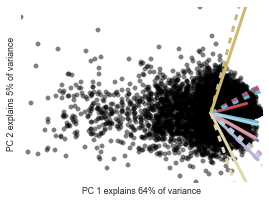

In [74]:


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(changing_kmer_zscores['Changing Events'].fillna(0)), 
                       index=changing_kmer_zscores['Changing Events'].index)
reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
print reduced.shape


fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
# ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
ax.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], color='k', alpha=0.5)

reduced_filtered = reduced[((reduced - reduced.mean()).abs() > 3*reduced.std()).any(axis=1)].dropna(how='all')

# for kmer, row in reduced_filtered.iterrows():
#     x = row[0]
#     y = row[1]
    
#     horizontalalignment = 'left' if x > 0 else 'right'
#     verticalalignment = 'bottom' if y > 0 else 'top'
#     ax.text(row[0], row[1], kmer, horizontalalignment=horizontalalignment, 
#             verticalalignment=verticalalignment, fontsize=8, alpha=0.75)
components = pd.DataFrame(pca.components_, columns=changing_kmer_zscores['Changing Events'].columns)


# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for status, status_df in components.groupby(kmer_metadata['Status'], axis=1):
    for arrow, arrow_df in status_df.groupby(kmer_metadata['Arrow'], axis=1):
        palette = reversed(sns.light_palette(arrow_to_color[arrow], n_colors=3))

        for color, (component, column) in zip(palette, arrow_df.iteritems()):
#             print tier, direction, component
            linestyle = '-' if status == 'changing' else 'dashed'
            labels.append(component)
            ax.plot([0, column[0]], [0, column[1]], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()
xmax, ymax = reduced.max()
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
fig.savefig('{}/kmer_pca_points.pdf'.format(figure_folder))

for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))


(5376, 2)
(5376, 2)


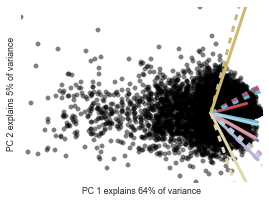

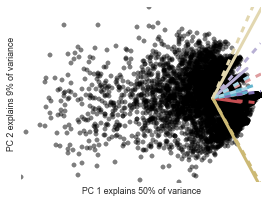

In [81]:
from sklearn.decomposition import PCA


for changing_events_col in changing_events_cols:
    data = changing_kmer_zscores[changing_events_col]
    data[np.isinf(data)] = 0

    pca = PCA(n_components=2)
    reduced = pd.DataFrame(pca.fit_transform(data.fillna(0)), 
                           index=data.index)
    reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
    reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
    print reduced.shape


    fig, ax = plt.subplots(figsize=(4, 3))
    # for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
    # ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
    ax.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], color='k', alpha=0.5)

    reduced_filtered = reduced[((reduced - reduced.mean()).abs() > 3*reduced.std()).any(axis=1)].dropna(how='all')

    # for kmer, row in reduced_filtered.iterrows():
    #     x = row[0]
    #     y = row[1]

    #     horizontalalignment = 'left' if x > 0 else 'right'
    #     verticalalignment = 'bottom' if y > 0 else 'top'
    #     ax.text(row[0], row[1], kmer, horizontalalignment=horizontalalignment, 
    #             verticalalignment=verticalalignment, fontsize=8, alpha=0.75)
    components = pd.DataFrame(pca.components_, columns=data.columns)


    # for color, (component, column) in zip(palette, components.iteritems()):
    labels = []
    for status, status_df in components.groupby(kmer_metadata['Status'], axis=1):
        for arrow, arrow_df in status_df.groupby(kmer_metadata['Arrow'], axis=1):
            palette = reversed(sns.light_palette(arrow_to_color[arrow], n_colors=3))

            for color, (component, column) in zip(palette, arrow_df.iteritems()):
    #             print tier, direction, component
                linestyle = '-' if status == 'changing' else 'dashed'
                labels.append(component)
                ax.plot([0, column[0]], [0, column[1]], label=component, 
                        linewidth=3, 
                        color=color, zorder=100, linestyle=linestyle)
    # ax.legend()
    xmin, ymin = reduced.min()
    xmax, ymax = reduced.max()
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    fig.tight_layout()
    sns.despine(bottom=True, left=True)
    ax.set(xticks=[], yticks=[]);

    for i, explained_variance in enumerate(pca.explained_variance_ratio_):
        if i == 0:
            ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
        else:
            ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
    fig.savefig('{}/kmer_pca_points.pdf'.format(folderize(changing_events_col)))


(5376, 2)
(5376, 2)


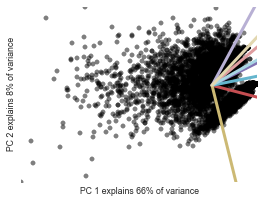

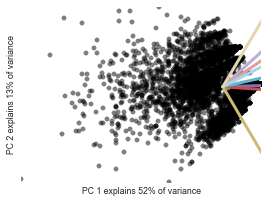

In [94]:
from sklearn.decomposition import PCA


for changing_events_col in changing_events_cols:
    data = changing_kmer_zscores[changing_events_col].copy()
    data = data.loc[:, data.columns.map(lambda x: x.startswith('changing'))]
    data[np.isinf(data)] = 0

    pca = PCA(n_components=2)
    reduced = pd.DataFrame(pca.fit_transform(data.fillna(0)), 
                           index=data.index)
    reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
    reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
    print reduced.shape


    fig, ax = plt.subplots(figsize=(4, 3))
    # for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
    # ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
    ax.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], color='k', alpha=0.5)

    reduced_filtered = reduced[((reduced - reduced.mean()).abs() > 3*reduced.std()).any(axis=1)].dropna(how='all')

    # for kmer, row in reduced_filtered.iterrows():
    #     x = row[0]
    #     y = row[1]

    #     horizontalalignment = 'left' if x > 0 else 'right'
    #     verticalalignment = 'bottom' if y > 0 else 'top'
    #     ax.text(row[0], row[1], kmer, horizontalalignment=horizontalalignment, 
    #             verticalalignment=verticalalignment, fontsize=8, alpha=0.75)
    components = pd.DataFrame(pca.components_, columns=data.columns)


    # for color, (component, column) in zip(palette, components.iteritems()):
    labels = []
    for status, status_df in components.groupby(kmer_metadata['Status'], axis=1):
        for arrow, arrow_df in status_df.groupby(kmer_metadata['Arrow'], axis=1):
            palette = reversed(sns.light_palette(arrow_to_color[arrow], n_colors=3))

            for color, (component, column) in zip(palette, arrow_df.iteritems()):
    #             print tier, direction, component
                linestyle = '-' if status == 'changing' else 'dashed'
                labels.append(component)
                ax.plot([0, column[0]], [0, column[1]], label=component, 
                        linewidth=3, 
                        color=color, zorder=100, linestyle=linestyle)
    # ax.legend()
    xmin, ymin = reduced.min()
    xmax, ymax = reduced.max()
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    fig.tight_layout()
    sns.despine(bottom=True, left=True)
    ax.set(xticks=[], yticks=[]);

    for i, explained_variance in enumerate(pca.explained_variance_ratio_):
        if i == 0:
            ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
        else:
            ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
    fig.savefig('{}/kmer_pca_points_changing_only.pdf'.format(folderize(changing_events_col)))


## Find CISBP motif enrichment

In [87]:
cisbp_folder = '/projects/ps-yeolab/obotvinnik/cisbp_v2'
cisbp_kmers = pd.read_csv('{}/kmers_in_cisbp_motifs_thresh05.csv'.format(cisbp_folder), index_col=0)
cisbp_kmers.head()

,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS,M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster,M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes,M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster,M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens
AAAA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
AAAC,False,False,False,False,False,False,True,True,False,False,...,True,False,False,False,True,False,True,False,False,False
AAAG,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,True,False
AAAT,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,True,True,False,False,False,False
AACA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,True,False,False


In [88]:
cisbp_metadata = pd.DataFrame.from_records(list(cisbp_kmers.columns.map(lambda x: x.split('_'))))
# cisbp_metadata = cisbp_metadata.replace(None, np.nan)
cisbp_metadata.index = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_metadata = cisbp_metadata.rename(columns={0:'Motif ID', 1: "Version", 2: "RBP Name", 3: "RBP ID", 4: "Genus", 5: "Species"})
cisbp_metadata['Full Species'] = cisbp_metadata['Genus'] + ' ' + cisbp_metadata['Species']
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Full Species
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Drosophila melanogaster
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Caenorhabditis elegans


Strict Changing Events
(88, 16)


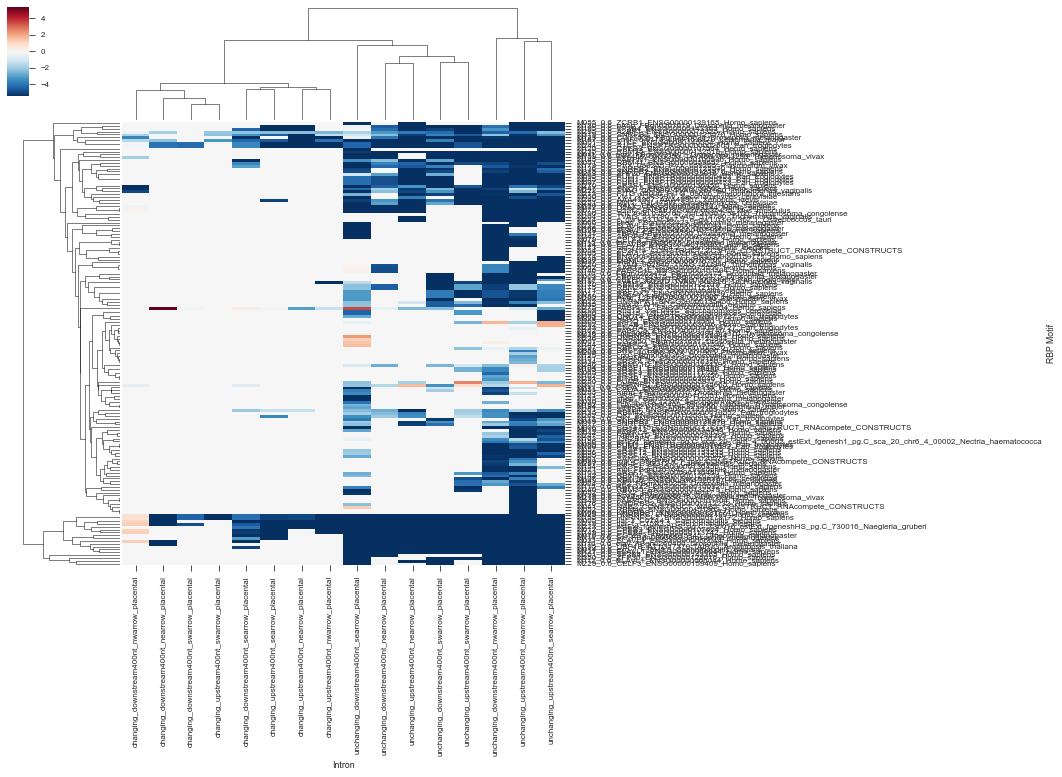

In [150]:
from scipy.stats import ttest_1samp

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)
t_statistics = {}
changing_events_col = 'Strict Changing Events'
# for changing_events_col in changing_events_cols:
print changing_events_col
data = changing_kmer_zscores[changing_events_col]
lines = []

for intron_name, intron_col in data.iteritems():
    mean = intron_col.mean()
    for cisbp_name, cisbp_kmer in cisbp_kmers.iteritems():
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], mean)
#             statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], 0)
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_ttest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif', 'T-Statistic', '$p$-value'])
kmer_cisbp_ttest_tidy = kmer_cisbp_ttest_tidy.dropna()
kmer_cisbp_ttest_tidy['$q$-value'] = kmer_cisbp_ttest_tidy.shape[0] * kmer_cisbp_ttest_tidy['$p$-value']

t_statistic = kmer_cisbp_ttest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
t_statistic = t_statistic.dropna(how='all')
t_statistic = t_statistic.fillna(0)
t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape
sns.clustermap(t_statistic, vmin=-5)
t_statistics[changing_events_col] = t_statistic_homo_sapiens

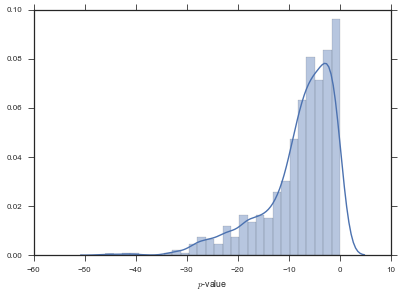

In [151]:
sns.distplot(np.log10(kmer_cisbp_ttest_tidy['$p$-value'].dropna()))

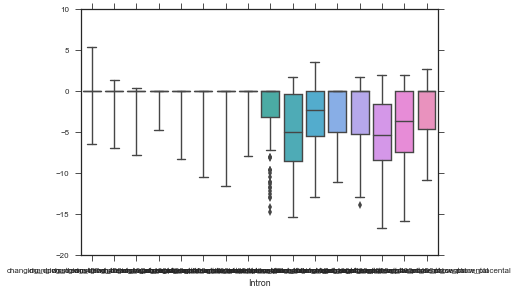

In [152]:
sns.boxplot(t_statistic)

In [153]:
kmer_cisbp_ttest_tidy.head()

,Intron,RBP Motif,T-Statistic,$p$-value,$q$-value
0,changing_upstream400nt_nearrow_placental,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-7.151354,1.354684e-07,1.095939e-04
4,changing_upstream400nt_nearrow_placental,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,-5.676666,6.930485e-07,5.606762e-04
24,changing_upstream400nt_nearrow_placental,M025_0.6_HNRNPC_ENSG00000092199_Homo_sapiens,-4.868859,9.297078e-05,7.521336e-02
122,changing_upstream400nt_nearrow_placental,M123_0.6_CG17838_FBgn0038826_Drosophila_melano...,-8.344415,1.550259e-10,1.254160e-07
129,changing_upstream400nt_nearrow_placental,M130_0.6_pAbp_FBgn0261619_Drosophila_melanogaster,-8.339894,7.274376e-12,5.884970e-09


In [154]:
subset = kmer_cisbp_ttest_tidy.loc[kmer_cisbp_ttest_tidy.Intron == 'changing_downstream400nt_nwarrow_placental']
subset = subset.dropna()
print subset.shape
subset.loc[subset['T-Statistic'] > 0]

(23, 5)


,Intron,RBP Motif,T-Statistic,$p$-value,$q$-value
1786,changing_downstream400nt_nwarrow_placental,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,1.178082,0.244341,197.671565
1793,changing_downstream400nt_nwarrow_placental,M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,1.238272,0.218115,176.455430
1806,changing_downstream400nt_nwarrow_placental,M025_0.6_HNRNPC_ENSG00000092199_Homo_sapiens,0.837631,0.412136,333.418400
1812,changing_downstream400nt_nwarrow_placental,M031_0.6_ELAVL1_ENSG00000066044_Homo_sapiens,1.337698,0.183831,148.719414
1858,changing_downstream400nt_nwarrow_placental,M077_0.6_U2AF2_ENSG00000063244_Homo_sapiens,0.239328,0.811667,656.638364
1859,changing_downstream400nt_nwarrow_placental,M078_0.6_U2af2_ENSMUSG00000030435_Mus_musculus,0.148464,0.882459,713.909120
1930,changing_downstream400nt_nwarrow_placental,M149_0.6_CPEB4_ENSG00000113742_Homo_sapiens,1.309215,0.194163,157.078257
1939,changing_downstream400nt_nwarrow_placental,M158_0.6_HNRNPCL1_ENSG00000179172_Homo_sapiens,0.837631,0.412136,333.418400
2000,changing_downstream400nt_nwarrow_placental,M219_0.6_tiar-1_C18A3.5_Caenorhabditis_elegans,1.341068,0.188537,152.526478
2040,changing_downstream400nt_nwarrow_placental,M275_0.6_PABPC1L_ENSG00000101104_Homo_sapiens,0.066660,0.948488,767.327072


In [155]:
# do filtering
t_statistic_positive = t_statistic[t_statistic > 0].dropna(how='all', axis=1).dropna(how='all', axis=0)
# subset on filtered cells so there's no NAs
t_statistic_positive = t_statistic.loc[t_statistic_positive.index, t_statistic_positive.columns]


In [165]:
t_statistic_positive.columns

Index([u'changing_downstream400nt_nearrow_placental',
       u'changing_downstream400nt_nwarrow_placental',
       u'changing_downstream400nt_searrow_placental',
       u'unchanging_downstream400nt_nwarrow_placental',
       u'unchanging_downstream400nt_searrow_placental',
       u'unchanging_upstream400nt_nearrow_placental',
       u'unchanging_upstream400nt_nwarrow_placental',
       u'unchanging_upstream400nt_searrow_placental',
       u'unchanging_upstream400nt_swarrow_placental'],
      dtype='object', name=u'Intron')

In [177]:
changing_to_colors = {'changing': '#262626', 'unchanging':'lightgrey'}
changing_colors = [changing_to_colors[x.split('_')[0]] for x in t_statistic_positive.columns]

direction_colors = [mpl.colors.rgb2hex(direction_to_color[x.split('_')[2]]) for x in t_statistic_positive.columns]

region_to_colors = dict(zip(['upstream400nt', 'downstream400nt'], 
                            map(mpl.colors.rgb2hex, sns.color_palette('PRGn', n_colors=2))))
region_colors = [region_to_colors[x.split('_')[1]] for x in t_statistic_positive.columns]
col_colors = [changing_colors, direction_colors, region_colors]

yticklabels = t_statistic_positive.index.map(lambda x: ' ' .join((x.split('_')[0], x.split('_')[2])))

[[<matplotlib.axis.XTick at 0x2b61644c1610>,

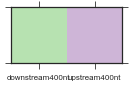

In [179]:
s = pd.Series(region_to_colors)
sns.palplot(s)
ax = plt.gca()
ax.set(xticklabels=s.index,xticks=range(s.shape[0]))

In [181]:
folderize(changing_events_col)

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/kmers/strict_changing_events'

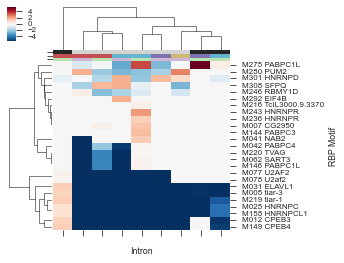

In [182]:
g = sns.clustermap(t_statistic_positive, vmin=-2, col_colors=col_colors, 
                   figsize=(4, 4), yticklabels=yticklabels)
g.ax_heatmap.set(xticklabels=[])
# g.ax_col_colors.set(yticks=None)
g.savefig('{}/top_motifs_clustermap.pdf'.format(folderize(changing_events_col)))

In [ ]:
for changing_events_col, data in t_statistics.items():

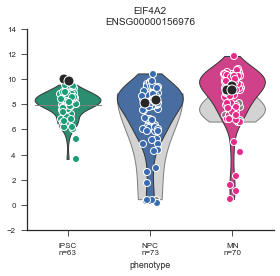

In [106]:
study.plot_gene('EIF4A2')

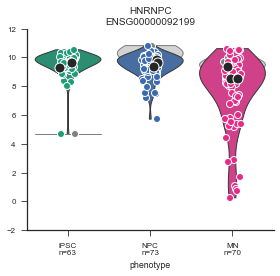

In [107]:
study.plot_gene('HNRNPC')

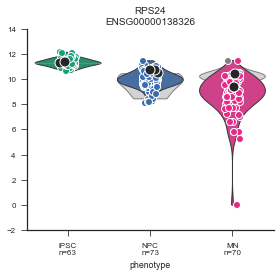

In [108]:
study.plot_gene('RPS24')

(88, 2)
(88, 2)


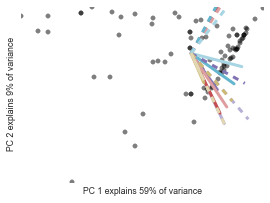

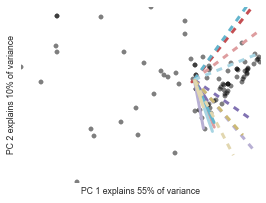

In [110]:
from sklearn.decomposition import PCA


for changing_events_col in changing_events_cols:
    data = t_statistics[changing_events_col].copy()
#     data = data.loc[:, data.columns.map(lambda x: x.startswith('changing'))]
    data[np.isinf(data)] = 0

    pca = PCA(n_components=2)
    reduced = pd.DataFrame(pca.fit_transform(data.fillna(0)), 
                           index=data.index)
    reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
    reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
    print reduced.shape


    fig, ax = plt.subplots(figsize=(4, 3))
    # for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
    # ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
    ax.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], color='k', alpha=0.5)

    reduced_filtered = reduced[((reduced - reduced.mean()).abs() > 3*reduced.std()).any(axis=1)].dropna(how='all')

    # for kmer, row in reduced_filtered.iterrows():
    #     x = row[0]
    #     y = row[1]

    #     horizontalalignment = 'left' if x > 0 else 'right'
    #     verticalalignment = 'bottom' if y > 0 else 'top'
    #     ax.text(row[0], row[1], kmer, horizontalalignment=horizontalalignment, 
    #             verticalalignment=verticalalignment, fontsize=8, alpha=0.75)
    components = pd.DataFrame(pca.components_, columns=data.columns)


    # for color, (component, column) in zip(palette, components.iteritems()):
    labels = []
    scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

    for status, status_df in components.groupby(kmer_metadata['Status'], axis=1):
        for arrow, arrow_df in status_df.groupby(kmer_metadata['Arrow'], axis=1):
            palette = reversed(sns.light_palette(arrow_to_color[arrow], n_colors=3))

            for color, (component, column) in zip(palette, arrow_df.iteritems()):
    #             print tier, direction, component
                linestyle = '-' if status == 'changing' else 'dashed'
                labels.append(component)
                ax.plot([0, column[0]*scaling_factor], [0, column[1]*scaling_factor], label=component, 
                        linewidth=3, 
                        color=color, zorder=100, linestyle=linestyle)
    # ax.legend()
    xmin, ymin = reduced.min()
    xmax, ymax = reduced.max()
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    fig.tight_layout()
    sns.despine(bottom=True, left=True)
    ax.set(xticks=[], yticks=[]);

    for i, explained_variance in enumerate(pca.explained_variance_ratio_):
        if i == 0:
            ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
        else:
            ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
    fig.savefig('{}/kmer_pca_points_changing_only.pdf'.format(folderize(changing_events_col)))


In [112]:
folderize(changing_events_col)

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/kmers/strict_changing_events'

In [93]:
t_statistic_homo_sapiens

Intron,changing_downstream400nt_nearrow_placental,changing_downstream400nt_nwarrow_placental,changing_downstream400nt_searrow_placental,changing_downstream400nt_swarrow_placental,changing_upstream400nt_nearrow_placental,changing_upstream400nt_nwarrow_placental,changing_upstream400nt_searrow_placental,changing_upstream400nt_swarrow_placental,unchanging_downstream400nt_nearrow_placental,unchanging_downstream400nt_nwarrow_placental,unchanging_downstream400nt_searrow_placental,unchanging_downstream400nt_swarrow_placental,unchanging_upstream400nt_nearrow_placental,unchanging_upstream400nt_nwarrow_placental,unchanging_upstream400nt_searrow_placental,unchanging_upstream400nt_swarrow_placental
RBP Motif,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-3.971407,-0.197262,-3.490876,-4.150802,-7.151354,-5.742990,-6.339822,0.000000,-8.025361,-8.590873,-4.244268,-8.143986,-9.214047,-9.663895,-7.717549,-4.640462
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,0.000000,1.238272,-5.218675,0.000000,0.000000,-7.153351,-8.297648,0.000000,-9.587582,-12.163970,-8.171570,-6.141409,-9.375084,-13.925554,-10.895959,-10.809526
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
M016_0.6_FMR1_ENSG00000102081_Homo_sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
M017_0.6_RBFOX2_ENSG00000100320_Homo_sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.621074,-3.034422,-3.800178,0.000000,-5.187635,-3.717687,-6.634040
M019_0.6_SRSF12_ENSG00000154548_Homo_sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.817921,0.000000,0.000000,-5.638177,-4.873108,0.000000
M020_0.6_FXR2_ENSG00000129245_Homo_sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [62]:
import pybedtools

In [63]:
len(event_names & background_events)

NameError: name 'event_names' is not defined

In [ ]:
exon2_bed_table[3].isin(event_names).sum()

In [ ]:
exon_bedfile = '{}/background_events.bed'.format(folder)
exon_bed = pybedtools.BedTool(exon_bedfile)
exon_bed.filter(lambda x: x.name in event_names)

In [ ]:
len(exon_bed)

In [ ]:
# for x in exon_bed:
#     if x.name in event_names:
#         print x.name

In [ ]:
x.name

In [ ]:
'exon:chr11:134120169-134120232:-@exon:chr11:134119722-134119814:-@exon:chr11:134118776-134119156:-' in background_events

### Redo this once you have the (-) strand exon data

In [ ]:
import pyhomer
DIRECTIONS = 'upstream', 'downstream'

import pybedtools

DIR = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

exon_bedfile = '{}/background_events.bed'.format(folder)
exon_bed = pybedtools.BedTool(exon_bedfile)

commands = []

findMotifsGenome = '/home/yeo-lab/software/homer/bin/findMotifsGenome.pl'
n_processors = 4
homer_flags = '-rna -len 4,5,6 -mset vertebrates -mis 0 -p {} -noweight'.format(n_processors)


primate_filename = '/projects/ps-yeolab/genomes/hg19/database/phastConsElements46wayPrimates.bed'
primate = pybedtools.BedTool(primate_filename)
placental_filename = '/projects/ps-yeolab/genomes/hg19/database/phastConsElements46wayPlacental.bed'
placental = pybedtools.BedTool(placental_filename)
conserved_regions = {'primate': primate, 'placental': placental}

conservation_bed = placental

genome = 'hg19'

nt = 400

from Bio import SeqIO
import kvector

genome_fasta = '/projects/ps-yeolab/genomes/hg19/chromosomes/all.fa'

def get_kmer_matrix(filename, kmer_lengths=(4, 5, 6)):
    kmers = kvector.kmer.make_kmers(kmer_lengths)
    
    with open(seqs.seqfn) as f:
        records = list(SeqIO.parse(f, 'fasta'))
#         records = [x.reverse_complement() if x.id[-1]]
    kmer_matrix = pd.DataFrame(0, columns=kmers, dtype=int, index=range(len(records)))

    for col, record in enumerate(records):
        for k in kmer_lengths:
            for i in range(len(record) - k + 1):
                kmer = str(record[i:(i+k)].seq).upper()
                kmer_matrix.loc[col, kmer] += 1
    return kmer_matrix


kmer_zscores = []

event_tiers = {'tier1': tier1, 'tier2': tier2}

for (tier, arrow), df in study.supplemental.voyages.groupby(['Tier', 'direction']):
    print '---\n', tier, arrow
    event_names = set(df.event_id)
    
    format_args = bed_folder, tier, remove_latex_chars_from_arrow(arrow)
    foreground_table = exon2_bed_table.loc[exon2_bed_table[3].isin(event_names)]
    foreground_filename = '{}/exon2_{}_{}_foreground.bed'.format(*format_args)
    foreground_table.to_csv(foreground_filename, index=False, header=False, sep='\t')
    foreground = pybedtools.BedTool(foreground_filename)

    background_bed = exon_bed
    background_filename = '{}/exon2_{}_{}_background.bed'.format(*format_args)
    background = pybedtools.BedTool(background_bed.saveas(background_filename))

    pair = pyhomer.ForegroundBackgroundPair(foreground, background)
#         print '\n', pair 

    for direction in DIRECTIONS:
        print '\n\t', direction
        intron_pair = pair.flanking_intron(direction, 'hg19', 400)

        conserved_introns = intron_pair.intersect(conservation_bed, 'placental')
#             print '\n', conserved_introns
#         %time 
        seqs = conserved_introns.foreground.sequence(fi=genome_fasta, s=True)
#         import pdb; pdb.set_trace()
        
        %time foreground_kmers = get_kmer_matrix(seqs.seqfn)

        %time seqs = conserved_introns.background.sequence(fi=genome_fasta, s=True)
        %time background_kmers = get_kmer_matrix(seqs.seqfn)
        kmer_zscore = (foreground_kmers.mean() - background_kmers.mean())/background_kmers.std()
        kmer_zscore.name = '{}{}nt_{}_{}_placental'.format(direction, nt, tier, remove_latex_chars_from_arrow(arrow))
        kmer_zscores.append(kmer_zscore)
kmer_zscores_all = pd.concat(kmer_zscores, axis=1)
kmer_zscores_all.head()

In [ ]:
kmer_zscores_all = pd.concat(kmer_zscores, axis=1)
print kmer_zscores_all.shape
kmer_zscores_all = kmer_zscores_all.dropna(how='all', axis=1)
kmer_zscores_all = kmer_zscores_all.fillna(0)
print kmer_zscores_all.shape
kmer_zscores_all.head()

In [ ]:
study.supplemental.tier12_kmer_zscores = kmer_zscores_all

In [ ]:
study.save('singlecell_pnm_figure4_voyages_kmers', flotilla_dir=flotilla_dir)

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(kmer_zscores_all, linewidth=1)
ax.set_xticklabels(kmer_zscores_all.columns, rotation=90);
xmin, xmax = ax.get_xlim()
ax.hlines(0, xmin, xmax, linestyle=':', color='k')
sns.despine()
fig.tight_layout()

In [ ]:
import matplotlib as mpl
from anchor import MODALITY_TO_COLOR

# dark2 = sns.color_palette('Dark2', n_colors=10)
# sns.palplot(dark2)
# accent = sns.color_palette('Accent', n_colors=10)
# sns.palplot(accent)
sns.palplot(MODALITY_PALETTE)

sns.palplot(sns.color_palette('PRGn', n_colors=2))
region_to_color = dict(zip(['upstream', 'downstream'], 
                            map(mpl.colors.rgb2hex, sns.color_palette('PRGn', n_colors=2))))
direction_to_color = {r'nwarrow': MODALITY_TO_COLOR['~1'], r'searrow': MODALITY_TO_COLOR['~0'],
                      r'swarrow': MODALITY_TO_COLOR['middle'], r'nearrow': MODALITY_TO_COLOR['bimodal']}
sequential = map(mpl.colors.rgb2hex, sns.color_palette('Blues_r', n_colors=2))
sns.palplot(sequential)

tier_to_color = dict(zip(['Tier 1', 'Tier 2'], sequential))

In [ ]:
from anchor import MODALITY_TO_COLOR
sns.set(style='whitegrid')

columns = kmer_zscores_all.columns

# phenotype_colors = columns.map(lambda x: phenotype_to_color[x.split('_')[1]])
tier_colors = columns.map(lambda x: tier_to_color[x.split('_')[1]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[2]])
region_colors = columns.map(lambda x: region_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = [tier_colors, direction_colors, region_colors]

sns.clustermap(kmer_zscores_all.corr(), figsize=(4, 4), col_colors=intron_colors, row_colors=intron_colors)

In [ ]:
sns.clustermap(kmer_zscores_all, col_colors=intron_colors, metric='sqeuclidean')

### Match kmers to known motifs

In [ ]:
kmer_folder = '{}/kmers'.format(figure_folder)
! mkdir $kmer_folder

In [ ]:
import kvector

cisbp_folder = '/projects/ps-yeolab/obotvinnik/cisbp_v2'

cisbp_motifs = kvector.read_motifs('{}/pwms_homer/all_rbps.motif'.format(cisbp_folder), 'ACGT')

In [ ]:
sns.set(style='ticks')
s = cisbp_motifs.map(len)
s.name = 'Motif length'
s = s.reset_index()
# s =
order = sorted(s['Motif length'].unique())
g = sns.factorplot(data=s, kind='count', x="Motif length", order=order, size=2, aspect=1.25)
g.savefig('{}/cisbp_motif_sizes.pdf'.format(figure_folder))

In [ ]:
cisbp_motifs_inf = cisbp_motifs.map(lambda x: x[x > 0.01])
cisbp_motifs_inf = cisbp_motifs_inf.map(lambda x: x.fillna(-np.inf))

In [ ]:
kmer_lengths = 4, 5, 6
kmers = kvector.io.make_kmers(kmer_lengths, 'ACGT')
kmers_list = map(list, kmers)

In [ ]:

def kmers_in_motif(pwm, kmers, vmin=0.01, threshold=0.5):
    """Generator to check if a kmer is exactly contained in a PWM

    This does not score kmers and PWMs, only checks if a kmer can 
    be exactly contained in a PWM with no mismatches, above a certain 
    threshold. Since most PWMs come with psuedocounts, the value 
    `vmin` is taken as the floor, and everything underneath will be 
    convered to -inf, so any 

    Parameters
    ----------
    pwm : pandas.DataFrame
        A (length, 4) dataframe of the weight of each position's probability
        of each nucleotide
    kmers : list of list
        A list of kmers strings as lists, e.g. [['G', 'G', 'G', 'G', 'G', 'G']]
    vmin : float
        Minimum value for a residue to have a valid value in a PWM

    """
    pwm[pwm <= vmin] = -np.inf
    
    motif_length = pwm.shape[0]
    for kmer in kmers:
        k = len(kmer)

        divisor = min(k, motif_length)
        if k == motif_length:
            score = np.sum(pwm.lookup(range(motif_length), kmer)) > 0
        elif k > motif_length:
            starts = range(k - motif_length + 1)
            n_positions = len(starts)
            score = any(np.sum(pwm.lookup(range(motif_length), kmer[start:(start+motif_length)]))/divisor > threshold for start in starts)
        else:
            # all that's left is: k < motif_length
            starts = range(motif_length - k + 1)
            n_positions = len(starts)
            score = any(np.sum(pwm.lookup(range(start, start+k), kmer))/divisor > threshold for start in starts)
        yield score

from kvector.kmer import make_kmers

def motifs_to_kmer_bool(motifs, residues, kmer_lengths):
    kmers = make_kmers(kmer_lengths, residues)
    kmers_list = map(list, kmers)

    motif_scores = motifs.map(
        lambda x: pd.Series(kmers_in_motif(x, kmers_list), index=kmers))
    motif_scores = pd.DataFrame.from_records(motif_scores).T
    motif_scores.columns = motifs.index
    return motif_scores

In [ ]:
%time cisbp_kmers = motifs_to_kmer_bool(cisbp_motifs, 'ACGT', kmer_lengths)
cisbp_kmers.head()

In [ ]:
cisbp_kmers.columns = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_kmers.head()

In [ ]:
cisbp_kmers.to_csv('{}/kmers_in_cisbp_motifs_thresh05.csv'.format(cisbp_folder))

In [ ]:
sns.set(style='ticks')    
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.distplot(cisbp_kmers.sum(), kde=False)
ax.locator_params(nbins=4)
xmin, xmax = ax.get_xlim()
ax.set(xlim=(0, xmax))
sns.despine()
fig.savefig('{}/cisbp_kmer_distribution.pdf'.format(figure_folder))

In [ ]:

kmer_sum = cisbp_kmers.sum()
kmer_sum[kmer_sum > 2000]

In [ ]:
kmer_means = study.supplemental.tier12_kmer_zscores.mean()

In [ ]:
cisbp_metadata = pd.DataFrame.from_records(list(cisbp_kmers.columns.map(lambda x: x.split('_'))))
# cisbp_metadata = cisbp_metadata.replace(None, np.nan)
cisbp_metadata.index = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_metadata = cisbp_metadata.rename(columns={0:'Motif ID', 1: "Version", 2: "RBP Name", 3: "RBP ID", 4: "Genus", 5: "Species"})
cisbp_metadata['Full Species'] = cisbp_metadata['Genus'] + ' ' + cisbp_metadata['Species']
cisbp_metadata.head()
cisbp_metadata.head()

### t-test of CISBP kmer enrichment over 0

In [ ]:
from scipy.stats import ttest_1samp

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.tier12_kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers.iteritems():
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], 0)
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_ttest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif', 'T-Statistic', '$p$-value'])
# kmer_cisbp_ttest_tidy['RBP Motif'] = kmer_cisbp_ttest_tidy['RBP Motif long'].str.split().str.get(0)
t_statistic = kmer_cisbp_ttest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape
sns.clustermap(t_statistic_homo_sapiens)

### Try same thing but with t-test vs kmer mean instead of 0

In [ ]:
cisbp_kmers.head()

In [ ]:
cisbp_metadata.head()

In [ ]:
cisbp_kmers_homo_sapiens = cisbp_kmers.loc[:, cisbp_metadata['Full Species'] == 'Homo sapiens']
cisbp_kmers_homo_sapiens.head()

In [ ]:
from scipy.stats import ttest_1samp

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.tier12_kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers_homo_sapiens.iteritems():
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], 0)
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_ttest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif', 'T-Statistic', '$p$-value'])
# kmer_cisbp_ttest_tidy['RBP Motif'] = kmer_cisbp_ttest_tidy['RBP Motif long'].str.split().str.get(0)
t_statistic = kmer_cisbp_ttest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
# t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape


In [ ]:
t_statistic_homo_sapiens

In [ ]:
columns = t_statistic_homo_sapiens.columns

# phenotype_colors = columns.map(lambda x: phenotype_to_color[x.split('_')[1]])
tier_colors = columns.map(lambda x: tier_to_color[x.split('_')[1]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[2]])
region_colors = columns.map(lambda x: region_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = [tier_colors, direction_colors, region_colors]

g = sns.clustermap(t_statistic_homo_sapiens.corr(), col_colors=intron_colors, row_colors=intron_colors)
g.savefig('{}/cisbp_t_statistic_pearson_correlation_clustermap.pdf'.format(kmer_folder))

In [ ]:
g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors)
g.savefig('{}/cisbp_t_statistic_clustermap.pdf'.format(kmer_folder))

In [ ]:
g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors, figsize=(4, 40))
g.savefig('{}/cisbp_t_statistic_clustermap_tall.pdf'.format(kmer_folder))

In [ ]:
# sns.pairplot(t_statistic_homo_sapiens)

In [ ]:
kmer_cisbp_ttest_tidy_metadata = pd.concat([kmer_cisbp_ttest_tidy, kmer_cisbp_ttest_tidy['Intron'].str.split('_').apply(pd.Series)],
                                          axis=1)
kmer_cisbp_ttest_tidy_metadata = kmer_cisbp_ttest_tidy_metadata.rename(columns={0:'region', 1:'Tier', 2:'direction', 3:'clade'})
kmer_cisbp_ttest_tidy_metadata.head()

In [ ]:
kmer_cisbp_ttest_tidy_metadata['$q$-value'] = kmer_cisbp_ttest_tidy_metadata.groupby('Intron', as_index=False, group_keys=False)\
    .apply(lambda x: x['$p$-value'] * x.shape[0])

In [ ]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.distplot(kmer_cisbp_ttest_tidy_metadata['$q$-value'])

In [ ]:
kmer_cisbp_ttest_tidy_significant = kmer_cisbp_ttest_tidy_metadata.loc[kmer_cisbp_ttest_tidy_metadata['$q$-value'] < 1e-3]
kmer_cisbp_ttest_tidy_significant

In [ ]:
tier1_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(lambda x: len(x) == 1 and x['Tier'] == 'Tier 1')

In [ ]:
both_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(lambda x: len(x) == 2)
both_significant_2d = both_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
both_significant_2d = both_significant_2d.fillna(0)
both_significant_2d.shape

In [ ]:
sns.clustermap(both_significant_2d)

In [ ]:
tier1_significant_2d = tier1_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
mask = tier1_significant_2d.isnull()

# Get the actual values for clustering
tier1_significant_2d = t_statistic_homo_sapiens.loc[tier1_significant_2d.index, :]
print tier1_significant_2d.shape
tier1_significant_2d.head()

In [ ]:
sns.set(style='darkgrid')
g = sns.clustermap(tier1_significant_2d, #mask=mask, 
               col_colors=intron_colors, figsize=(4, 30))
g.savefig('{}/cisbp_t_statistic_tier1_significant_clustermap.pdf'.format(kmer_folder))

In [ ]:
sns.set(style='darkgrid')
g = sns.clustermap(tier1_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 30))
g.savefig('{}/cisbp_t_statistic_tier1_significant_clustermap_masked.pdf'.format(kmer_folder))

In [ ]:
tier2_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(
    lambda x: len(x) == 1 and x['Tier'] == 'Tier 2')
tier2_significant_2d = tier2_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
mask = tier2_significant_2d.isnull()

# Get the actual values for clustering
tier2_significant_2d = t_statistic_homo_sapiens.loc[tier2_significant_2d.index, :]
print tier2_significant_2d.shape
tier2_significant_2d.head()

In [ ]:
sns.set(style='darkgrid')
sns.clustermap(tier2_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 20))

In [ ]:
sns.set(style='darkgrid')
sns.clustermap(tier2_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 20))